# Employee Attrition Prediction



In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

### read CSV

In [46]:
df = pd.read_csv('hr-employee-attrition-with-null.csv')

### Dataset statistic

In [47]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [48]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [49]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = pd.Categorical(df[col]).codes

# HANDLE NULL NUMBERS
# INSERT CODE HERE

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

###  Spliting data into train and test

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['Attrition'], random_state=69)

### Display histogram of each feature

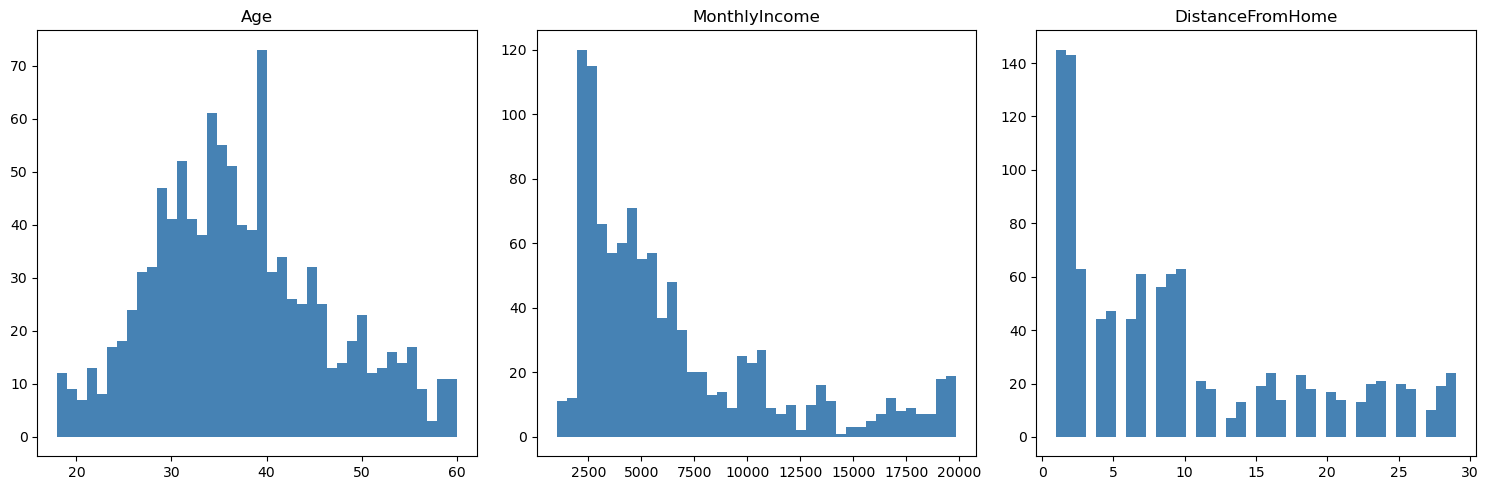

In [53]:
def display_histogram_subplot(df, col_name, n_bin=40, nrows=1, ncols=1, index=1):
    df_col_no_nan = df[~np.isnan(df[col_name])]
    hist, bin_edge = np.histogram(df_col_no_nan[col_name], n_bin)

    plt.subplot(nrows, ncols, index)
    plt.fill_between(bin_edge.repeat(2)[1:-1], hist.repeat(2), facecolor='steelblue')
    plt.title(col_name)

fig = plt.figure(figsize=(15, 5))
display_histogram_subplot(df_train, 'Age', nrows=1, ncols=3, index=1)
display_histogram_subplot(df_train, 'MonthlyIncome', nrows=1, ncols=3, index=2)
display_histogram_subplot(df_train, 'DistanceFromHome', nrows=1, ncols=3, index=3)

plt.tight_layout()
plt.show()


### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?  
  
zero counts bins:  
Age: 0  
MonthlyIncome: 0  
DistanceFromHome: 11  
No, because in DistanceFromHome has zero counts bins.

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?  
As seen from histograms, data is not normal distributed (not all attribute), so Gaussian is not a good choice to estimate this.  
GMM might work, since mixture of gaussian can fit a curve line.  

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

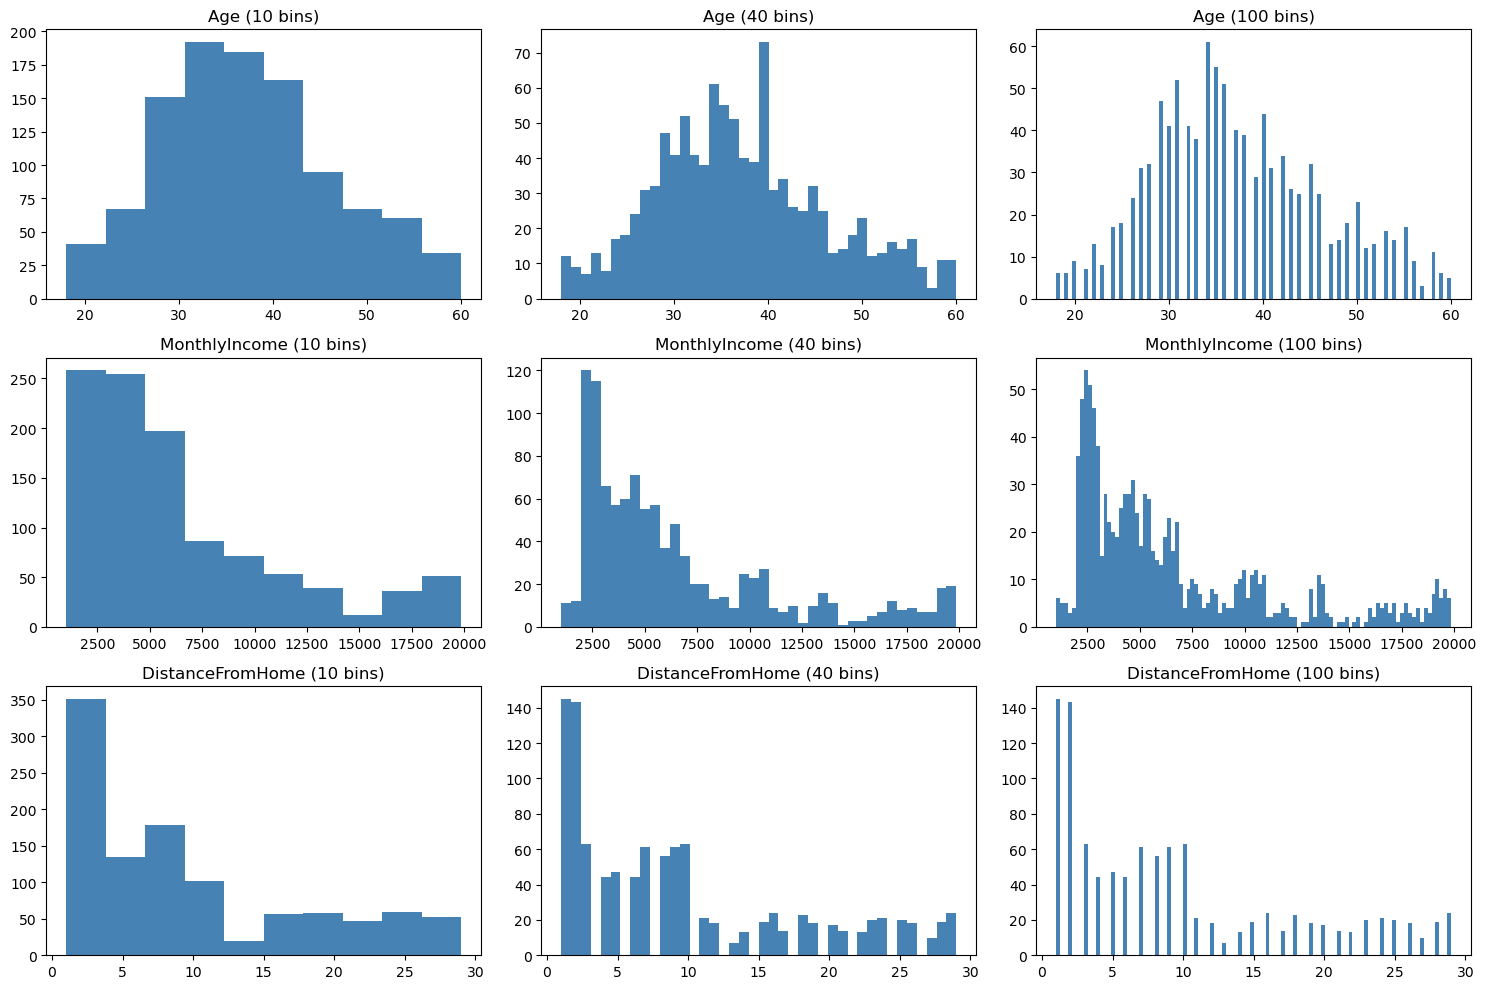

In [54]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

# Age
axes[0, 0].hist(df_train['Age'].dropna(), bins=10, color='steelblue')
axes[0, 0].set_title('Age (10 bins)')
axes[0, 1].hist(df_train['Age'].dropna(), bins=40, color='steelblue')
axes[0, 1].set_title('Age (40 bins)')
axes[0, 2].hist(df_train['Age'].dropna(), bins=100, color='steelblue')
axes[0, 2].set_title('Age (100 bins)')

# MonthlyIncome
axes[1, 0].hist(df_train['MonthlyIncome'].dropna(), bins=10, color='steelblue')
axes[1, 0].set_title('MonthlyIncome (10 bins)')
axes[1, 1].hist(df_train['MonthlyIncome'].dropna(), bins=40, color='steelblue')
axes[1, 1].set_title('MonthlyIncome (40 bins)')
axes[1, 2].hist(df_train['MonthlyIncome'].dropna(), bins=100, color='steelblue')
axes[1, 2].set_title('MonthlyIncome (100 bins)')

# DistanceFromHome
axes[2, 0].hist(df_train['DistanceFromHome'].dropna(), bins=10, color='steelblue')
axes[2, 0].set_title('DistanceFromHome (10 bins)')
axes[2, 1].hist(df_train['DistanceFromHome'].dropna(), bins=40, color='steelblue')
axes[2, 1].set_title('DistanceFromHome (40 bins)')
axes[2, 2].hist(df_train['DistanceFromHome'].dropna(), bins=100, color='steelblue')
axes[2, 2].set_title('DistanceFromHome (100 bins)')


plt.tight_layout()
plt.show()

Age: 40  
MonthlyIncome: 40  
DistanceFromHome: 10  
Because it is the size that represent trend of data without zero bin counts and does not loss information (still see the trend).

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

Choose every feature that may affect the prediction (exclude attrition since it's what to predict) and have no zero count bins.

In [55]:
df_train_leave = df_train.loc[df_train['Attrition'] == 1.0]
df_train_stay = df_train.loc[df_train['Attrition'] == 0.0]

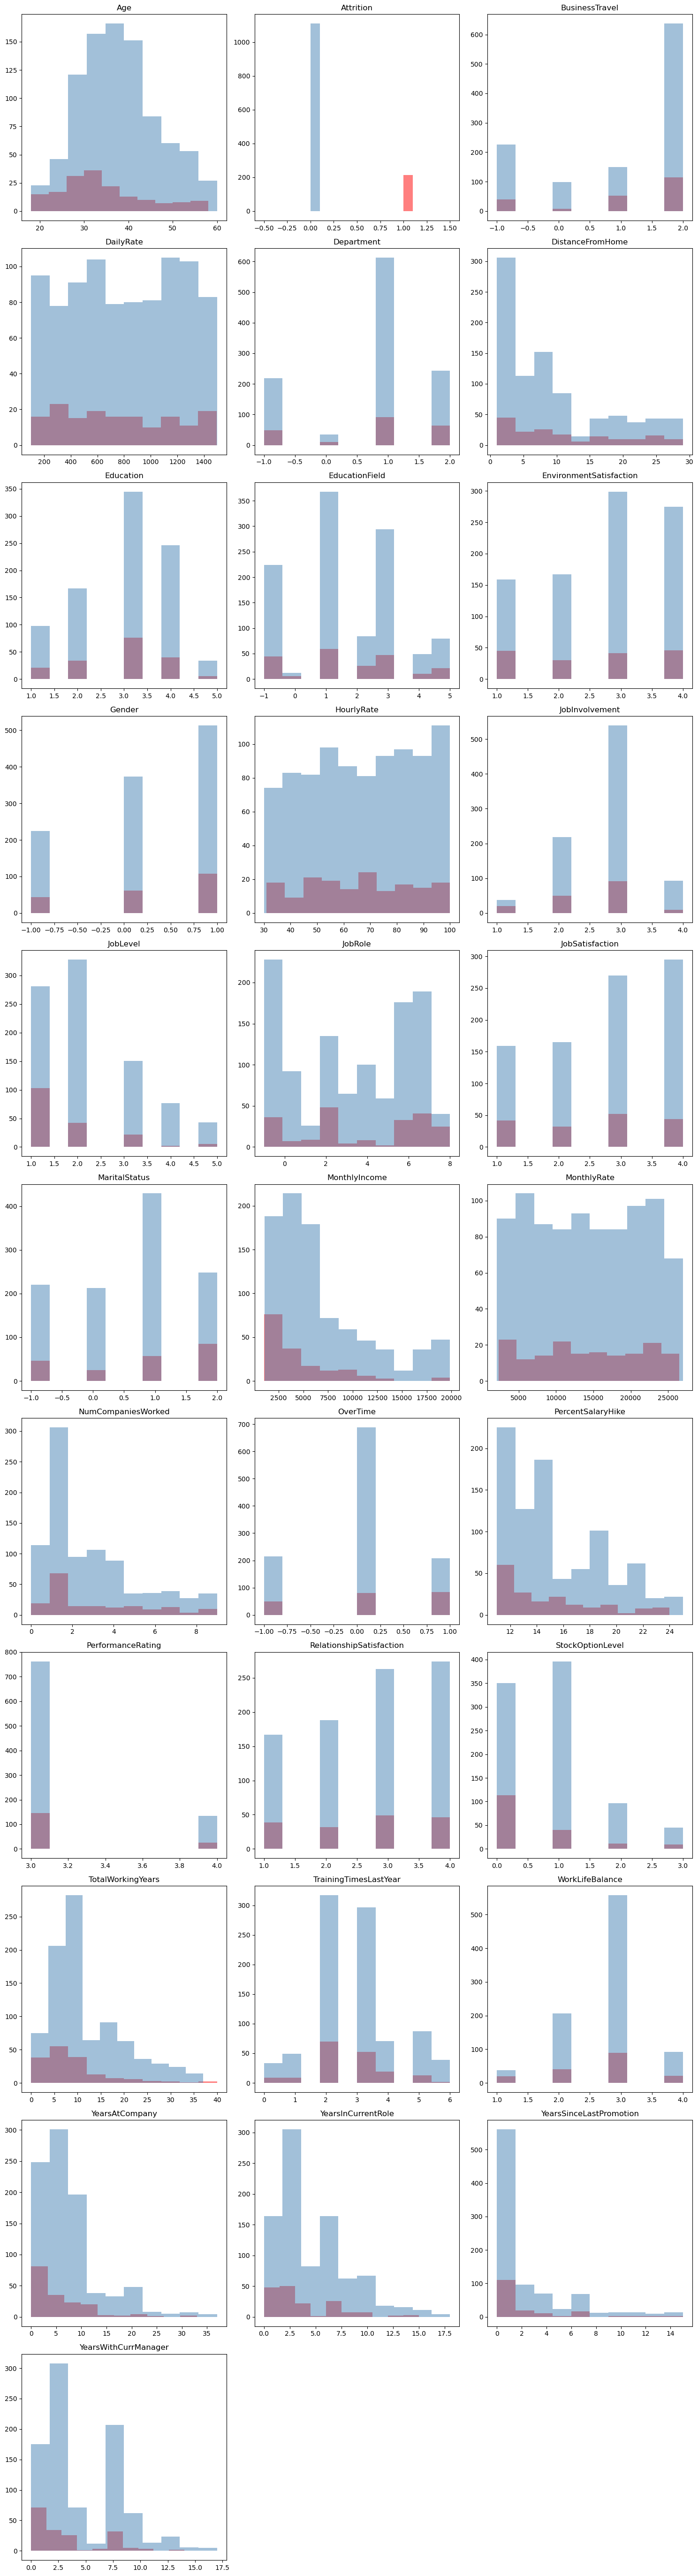

In [56]:
num_cols = len(df_train.columns)
num_subplots = num_cols // 3 + (num_cols % 3 > 0)

fig, axes = plt.subplots(num_subplots, 3, figsize=(15, num_subplots * 5))
axes = axes.flatten()

for idx, col in enumerate(df_train.columns):
    df_train_leave_no_nan = df_train_leave[~np.isnan(df_train_leave[col])]
    df_train_stay_no_nan = df_train_stay[~np.isnan(df_train_stay[col])]
    hist1, bin_edge1 = np.histogram(df_train_leave_no_nan[col], 10)
    hist2, bin_edge2 = np.histogram(df_train_stay_no_nan[col], 10)
    ax = axes[idx]
    ax.fill_between(bin_edge1.repeat(2)[1:-1], hist1.repeat(2), facecolor='red', alpha=0.5)
    ax.fill_between(bin_edge2.repeat(2)[1:-1], hist2.repeat(2), facecolor='steelblue', alpha=0.5)
    ax.set_title(col)

# Hide empty subplots
for ax in axes[num_cols:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

Multinomial ditribution  
$\text{Likelihood of multinomial is } l(p_1,...,p_m) = log(n!) - \sum_{j=1}^{m} log(x_j!) - \sum_{j=1}^{m} x_j log(p_j)$  
Apply method of Lagrange multipliers with constraint: $\sum_{j=1}^{m} p_j = 1$  
Solution of MLE is $p_j = \frac{x_j}{n}, j = 1,...,m$ where $n$ is number of data and $m$ is number of features.  
Ref: https://ocw.mit.edu/ans7870/18/18.443/s15/projects/Rproject3_rmd_multinomial_theory.html

### T9. What is the prior distribution of the two classes?

In [57]:
print("Prior distribution of leave = ", df.loc[df["Attrition"] == 1].shape[0] / df.shape[0])
print("Prior distribution of stay = ", df.loc[df["Attrition"] == 0].shape[0] / df.shape[0])

Prior distribution of leave =  0.16122448979591836
Prior distribution of stay =  0.8387755102040816


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

1. Flooring: use a very small value instead of 0, such as, $10^-9$  
2. Smoothing: steal value from other observations to distribute to all zero  
3. Use prior (MAP)

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [58]:
class SimpleBayesClassifier:

    def __init__(self, n_pos, n_neg):
        
        """
        Initializes the SimpleBayesClassifier with prior probabilities.

        Parameters:
        n_pos (int): The number of positive samples.
        n_neg (int): The number of negative samples.
        
        Returns:
        None: This method does not return anything as it is a constructor.
        """

        self.n_pos = n_pos
        self.n_neg = n_neg
        self.prior_pos = n_pos / (n_pos + n_neg)
        self.prior_neg = n_neg / (n_pos + n_neg)

    def fit_params(self, x, y, n_bins = 10):

        """
        Computes histogram-based parameters for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.
        n_bins (int): Number of bins to use for histogram calculation.

        Returns:
        (stay_params, leave_params): A tuple containing two lists of tuples, 
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the bins and edges of the histogram for a feature.
        """

        self.stay_params = [(None, None) for _ in range(x.shape[1])]
        self.leave_params = [(None, None) for _ in range(x.shape[1])]

        # INSERT CODE HERE
        for i in range(x.shape[1]):
            x_no_nan = x[:, i][~np.isnan(x[:, i])]
            y_no_nan = y[~np.isnan(x[:, i])]
            x_pos = x_no_nan[y_no_nan == 1]
            x_neg = x_no_nan[y_no_nan == 0]
            h_pos, e_pos = np.histogram(x_pos, n_bins)
            h_neg, e_neg = np.histogram(x_neg, n_bins)
            self.stay_params[i] = (h_neg, e_neg)
            self.leave_params[i] = (h_pos, e_pos)
        return self.stay_params, self.leave_params

    def predict(self, x, thresh = 0):

        """
        Predicts the class labels for the given samples using the non-parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE
        lH_x = []
        for i in range(x.shape[0]): # iterate data
            xi = x[i, :]
            sum_log = 0
            for j, xij in enumerate(xi): # iterate feature
                if(np.isnan(xij)): continue
                hj_leave, ej_leave = self.leave_params[j]
                hj_stay, ej_stay = self.stay_params[j]
                hidx_leave = min(np.digitize(xij, ej_leave) - 1, len(hj_leave) - 1)
                hidx_stay = min(np.digitize(xij, ej_stay) - 1, len(hj_stay) - 1)
                p_xi_leave = (hj_leave[hidx_leave] / np.sum(hj_leave))
                p_xi_stay = (hj_stay[hidx_stay] / np.sum(hj_stay))
                sum_log += np.log(p_xi_leave) - np.log(p_xi_stay)
            lH_xi = np.log(self.prior_pos) - np.log(self.prior_neg) + sum_log
            if(lH_xi >= thresh): y_pred.append(1)
            else: y_pred.append(0)
            lH_x.append(lH_xi)

        return y_pred, lH_x
    
    def fit_gaussian_params(self, x, y):

        """
        Computes mean and standard deviation for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.

        Returns:
        (gaussian_stay_params, gaussian_leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the mean and standard deviation for a feature.
        """

        self.gaussian_stay_params = [(0, 0) for _ in range(x.shape[1])]
        self.gaussian_leave_params = [(0, 0) for _ in range(x.shape[1])]
        
        # INSERT CODE HERE
        for i in range(x.shape[1]):
            x_no_nan = x[:, i][~np.isnan(x[:, i])]
            y_no_nan = y[~np.isnan(x[:, i])]
            x_pos = x_no_nan[y_no_nan == 1]
            x_neg = x_no_nan[y_no_nan == 0]
            self.gaussian_stay_params[i] = (np.mean(x_neg), np.std(x_neg))
            self.gaussian_leave_params[i] = (np.mean(x_pos), np.std(x_pos))
        return self.gaussian_stay_params, self.gaussian_leave_params
    
    def gaussian_predict(self, x, thresh = 0):

        """
        Predicts the class labels for the given samples using the parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []
        
        # INSERT CODE HERE
        lH_x = []
        for i in range(x.shape[0]): # iterate data
            xi = x[i, :]
            sum_log = 0
            for j, xij in enumerate(xi): # iterate feature
                if(np.isnan(xij)): continue
                mean_leave, std_leave = self.gaussian_leave_params[j]
                mean_stay, std_stay = self.gaussian_stay_params[j]
                p_xi_leave = stats.norm(mean_leave, std_leave).pdf(xij)
                p_xi_stay = stats.norm(mean_stay, std_stay).pdf(xij)
                sum_log += np.log(p_xi_leave) - np.log(p_xi_stay)
            lH_xi = np.log(self.prior_pos) - np.log(self.prior_neg) + sum_log
            if(lH_xi >= thresh): y_pred.append(1)
            else: y_pred.append(0)
            lH_x.append(lH_xi)

        return y_pred, lH_x

In [59]:
x_train = df_train.drop(columns='Attrition').to_numpy()
y_train = df_train['Attrition'].to_numpy()
x_test = df_test.drop(columns='Attrition').to_numpy()
y_test = df_test['Attrition'].to_numpy()

In [60]:
model = SimpleBayesClassifier(n_pos = y_train.sum(), n_neg = y_train.shape[0] - y_train.sum())

In [61]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8, 5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)
    
check_prior()

In [ ]:
model.fit_params(x_train, y_train)

In [63]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
Feature : 1
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 2
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 3
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]

LEAVE PARAMETERS
Feature : 0
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3. ]
Feature : 1
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
Feature : 2
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [3.  3.2 3.4 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
Feature : 3
BINS : [1 0 0 0 0 0 0 0 0 1]
EDGES : [4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8 6. ]


In [64]:
y_pred, _ = model.predict(x = x_test)

In [65]:
def evaluate(y_true, y_pred, show_result = True):
  TP = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
  FP = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
  TN = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
  FN = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))
  # print(TP, FP, TN, FN)
  accuracy = (TP + TN) / (len(y_pred))
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)
  F1 = (2 * precision * recall) / (precision + recall)
  fpr = FP / (FP + TN)
  if(np.isnan(accuracy)): accuracy = 0
  if(np.isnan(precision)): precision = 0
  if(np.isnan(recall)): recall = 0
  if(np.isnan(F1)): F1 = 0
  if(np.isnan(fpr)): fpr = 0
  return accuracy, precision, recall, F1, fpr

In [66]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", F1)
print("False Positive Rate =", fpr)

Accuracy = 0.8435374149659864
Precision = 0.5172413793103449
Recall = 0.625
F1 Score = 0.5660377358490567
False Positive Rate = 0.11382113821138211


### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [ ]:
model.fit_gaussian_params(x_train, y_train)

In [68]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [69]:
y_pred, _ = model.gaussian_predict(x_test)

In [70]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", F1)
print("False Positive Rate =", fpr)

Accuracy = 0.7755102040816326
Precision = 0.36363636363636365
Recall = 0.5
F1 Score = 0.4210526315789474
False Positive Rate = 0.17073170731707318


### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [71]:
random_state = np.random.RandomState(seed=69)
y_pred_random = [random_state.randint(2) for _ in range(len(y_test))]

In [72]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred_random)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", F1)
print("False Positive Rate =", fpr)

Accuracy = 0.40816326530612246
Precision = 0.1111111111111111
Recall = 0.375
F1 Score = 0.17142857142857143
False Positive Rate = 0.5853658536585366


### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [73]:
y_pred_majority = [0 for _ in range(len(y_test))]

In [74]:
accuracy, precision, recall, F1, fpr = evaluate(y_test, y_pred_majority)
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score =", F1)
print("False Positive Rate =", fpr)

Accuracy = 0.8367346938775511
Precision = 0
Recall = 0.0
F1 Score = 0
False Positive Rate = 0.0


### T15. Compare the two baselines with your Naive Bayes classifier.


| Model | Recall | Precision | F1 | Accuracy |
| --- | --- | --- | --- | --- |
| Naïve Bayes Histogram  | 0.625 | 0.517 | 0.566 | 0.844 |
| Naïve Bayes Gaussian   | 0.500 | 0.363 | 0.421 | 0.776 |
| Baseline random        | 0.375 | 0.111 | 0.171 | 0.408 |
| Baseline majority rule | 0   | 0   | 0   | 0.837 |


### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [75]:
best_acc = -1
best_F1 = -1
best_t_acc = 0
best_t_F1 = 0

best_acc_gaussian = -1
best_F1_gaussian = -1
best_t_acc_gaussian = 0
best_t_F1_gaussian = 0

_, lH_x = model.predict(x_test)
_, lH_x_gaussian = model.gaussian_predict(x_test)
for t in np.arange(-5,5,0.05):
    y_t = []
    for i in range(len(y_test)):
        if(lH_x[i] >= t): y_t.append(1)
        else: y_t.append(0)
    acc, _, _, F1, _ = evaluate(y_test, y_t)
    if acc > best_acc:
        best_acc = acc
        best_t_acc = t
    if F1 > best_F1:
        best_F1 = F1
        best_t_F1 = t
    y_t_gaussian = []
    for i in range(len(y_test)):
        if(lH_x_gaussian[i] >= t): y_t_gaussian.append(1)
        else: y_t_gaussian.append(0)
    if acc > best_acc_gaussian:
        best_acc_gaussian = acc
        best_t_acc_gaussian = t
    if acc > best_F1_gaussian:
        best_F1_gaussian = F1
        best_t_F1_gaussian = t
print("=== Non-parametric ===")
print("Best accuracy =", best_acc)
print("Best threshold for accuracy =", best_t_acc)
print("Best F1 score =", best_F1)
print("Best threshold for F1 =", best_t_F1)
print("=== Gaussian ===")
print("Best accuracy =", best_acc_gaussian)
print("Best threshold for accuracy =", best_t_acc_gaussian)
print("Best F1 score =", best_F1_gaussian)
print("Best threshold for F1 =", best_t_F1_gaussian)

=== Non-parametric ===
Best accuracy = 0.891156462585034
Best threshold for accuracy = 0.7999999999999794
Best F1 score = 0.6363636363636365
Best threshold for F1 = 0.7999999999999794
=== Gaussian ===
Best accuracy = 0.891156462585034
Best threshold for accuracy = 0.7999999999999794
Best F1 score = 0.21428571428571427
Best threshold for F1 = 4.949999999999964


### T17. Plot the RoC of your classifier.

In [76]:
def roc_curve(prob):
    thresholds = np.unique(prob)
    fpr, tpr = [], []
    for t in thresholds:
        y_t = []
        for i in range(len(y_test)):
            if(prob[i] >= t): y_t.append(1)
            else: y_t.append(0)
        _, _, recall, _, fpr_t = evaluate(y_test, y_t)
        fpr.append(fpr_t)
        tpr.append(recall)
    return fpr, tpr

In [77]:
nonpara_fpr, nonpara_tpr = roc_curve(lH_x)
gaussian_fpr, gaussian_tpr = roc_curve(lH_x_gaussian)

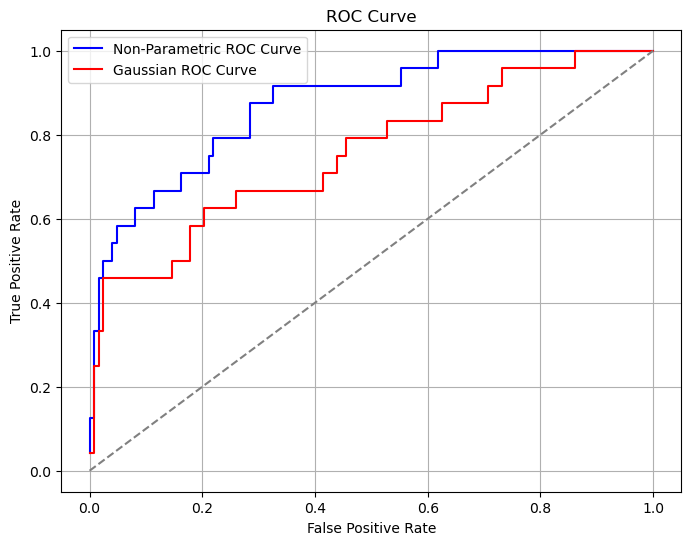

In [78]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(nonpara_fpr, nonpara_tpr, color='blue', label='Non-Parametric ROC Curve')
plt.plot(gaussian_fpr, gaussian_tpr, color='red', label='Gaussian ROC Curve')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.grid(True)
plt.show()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [ ]:
model.fit_params(x_train, y_train, 5)

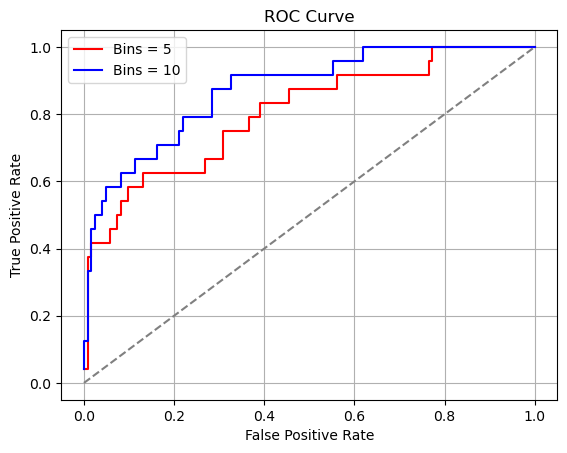

In [80]:
_, lH_x_t = model.predict(x_test)
bin5_fpr, bin5_tpr = roc_curve(lH_x_t)

plt.plot(bin5_fpr, bin5_tpr, color='red', label='Bins = 5')
plt.plot(nonpara_fpr, nonpara_tpr, color='blue', label='Bins = 10')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.grid(True)
plt.show()

From ROC Curve, Bins = 10 is better discretization.

### OT4: Shuffle the database, and create new test and train sets. Redo the entire training and evaluation process 10 times (each time with a new training and test set). Calculate the mean and variance of the accuracy rate.  

In [81]:
df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['Attrition'], random_state=69)
x_train = df_train.drop(columns='Attrition').to_numpy()
y_train = df_train['Attrition'].to_numpy()
x_test = df_test.drop(columns='Attrition').to_numpy()
y_test = df_test['Attrition'].to_numpy()

random_state_list = [random_state.randint(0, 1000) for _ in range(10)]
acc_list = []
acc_list_gaussian = []

for _ in range(10):
    df_train, df_test = train_test_split(df, test_size=0.1, stratify=df['Attrition'], random_state=random_state_list[_])
    x_train = df_train.drop(columns='Attrition').to_numpy()
    y_train = df_train['Attrition'].to_numpy()
    x_test = df_test.drop(columns='Attrition').to_numpy()
    y_test = df_test['Attrition'].to_numpy()
    model_t = SimpleBayesClassifier(n_pos = y_train.sum(), n_neg = y_train.shape[0] - y_train.sum())
    model_t.fit_params(x_train, y_train)
    y_pred, _ = model_t.predict(x_test)
    model_t.fit_gaussian_params(x_train, y_train)
    y_pred_gaussian, _ = model_t.gaussian_predict(x_test)
    acc, _, _, _, _ = evaluate(y_test, y_pred)
    acc_gaussian, _, _, _, _ = evaluate(y_test, y_pred_gaussian)
    acc_list.append(acc)
    acc_list_gaussian.append(acc_gaussian)

print("Mean of accuracy (Non-parametric) =", np.mean(acc_list))
print("Variance of accuracy (Non-parametric) =", np.var(acc_list))
print("Mean of accuracy (Gaussian) =", np.mean(acc_list_gaussian))
print("Variance of accuracy (Gaussian) =", np.var(acc_list_gaussian))

Mean of accuracy (Non-parametric) = 0.829251700680272
Variance of accuracy (Non-parametric) = 0.0006612985330186492
Mean of accuracy (Gaussian) = 0.791156462585034
Variance of accuracy (Gaussian) = 0.0012129205423666066
